In [ ]:
# Training and Testing an MDRNN on Sample Data

This script trains and tests a mixture density recurrent neural network (MDRNN) on 

In [4]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import time
import sketch_mdn

# Test Running Network

Test Input: [ 0.01155445  8.56839734]
INFO:tensorflow:Restoring parameters from ./mixture-rnn-1layers-128units
Test Output:


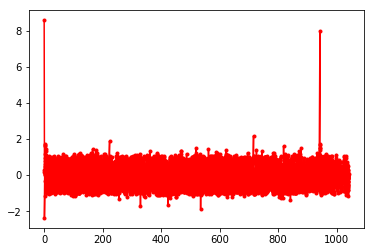

                  t             x          time
count  10001.000000  10001.000000  10001.000000
mean       0.104085     -0.004269    520.272743
std        0.058054      0.598655    300.846364
min       -0.985975     -2.366042      0.011554
25%        0.097439     -0.501675    261.425309
50%        0.103460     -0.019151    520.151597
75%        0.109093      0.473113    781.170850
max        3.582804      8.568397   1040.956512
Window: 1000 to 1100


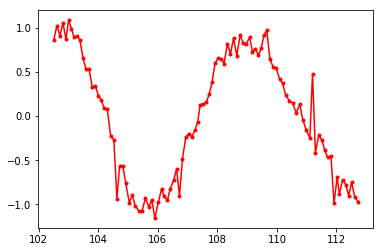

Window: 2000 to 2100


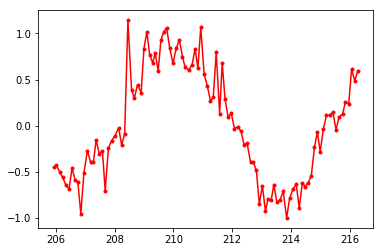

Window: 3000 to 3100


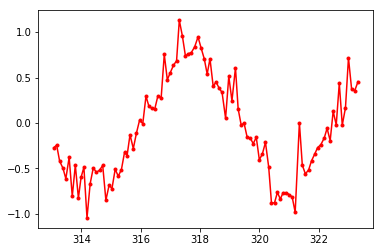

Window: 4000 to 4100


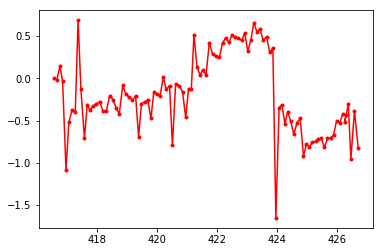

Window: 5000 to 5100


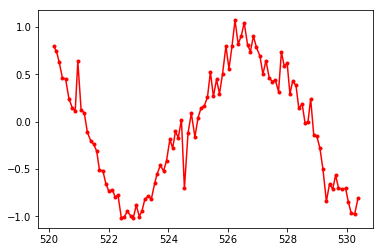

Window: 6000 to 6100


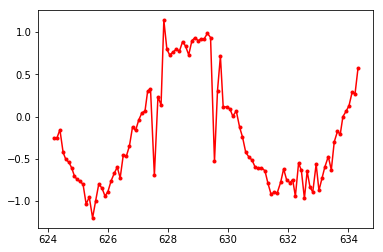

In [14]:
# Instantiate Running Network
net = sketch_mdn.MixtureRNN(mode = sketch_mdn.NET_MODE_RUN, n_hidden_units = 128, n_mixtures = 10, batch_size = 1, sequence_length = 1)

first_touch = np.array([(0.01 + (np.random.rand()-0.5)*0.005), (np.random.rand()-0.5)*20])
print("Test Input:",first_touch)
with tf.Session() as sess:
    perf = net.generate_performance(first_touch,10000,sess)
print("Test Output:")
perf_df = pd.DataFrame({'t':perf.T[0], 'x':perf.T[1]})
perf_df['time'] = perf_df.t.cumsum()
#plt.show(perf_df.plot('time','x',kind='scatter'))
plt.plot(perf_df.time, perf_df.x, '.r-')
plt.show()
print(perf_df.describe())
## Investigate Output
window = 100
for n in [1000,2000,3000,4000,5000,6000]:
    print("Window:", str(n),'to',str(n+window))
    plt.plot(perf_df[n:n+window].time, perf_df[n:n+window].x, '.r-')
    plt.show()

# input_touch = first_touch.reshape([1,1,net.n_input_units]) ## Give input correct shape for one-at-a-time evaluation.
# if net.state is not None:
#     feed = {net.x: input_touch, net.init_state: net.state}
# else:
#     feed = {net.x: input_touch}
# pis, locs_1, locs_2, scales_1, scales_2, corr, net.state = sess.run([net.pis, net.locs_1, net.locs_2, net.scales_1, net.scales_2,  net.corr, net.final_state], feed_dict=feed)
# #x_1, x_2 = sketch_mixture.sample_mixture_model(pis, locs_1, locs_2, scales_1, scales_2, corr, temp=1.0, greedy=False)


## Test Training

INFO:tensorflow:Loading Training Operations
INFO:tensorflow:done initialising: mixture-rnn-1layers-128units vars: 74812
Generating 50000 toy data samples.
                  t             x
count  50000.000000  50000.000000
mean       0.099998      0.000301
std        0.007101      0.708808
min        0.000100     -1.172703
25%        0.095260     -0.705260
50%        0.100008      0.002489
75%        0.104783      0.704748
max        0.128616      1.171742
Total training examples: 49878
Done initialising loader.
INFO:tensorflow:going to train: mixture-rnn-1layers-128units
INFO:tensorflow:trained batch: 200 of 498; loss was -1.695516
INFO:tensorflow:trained batch: 400 of 498; loss was -3.209105
INFO:tensorflow:trained epoch 0 of 10
INFO:tensorflow:saving model ./output-logs/mixture-rnn-1layers-128units-20180109-105539/mixture-rnn-1layers-128units.ckpt, global_step 498.
INFO:tensorflow:trained batch: 200 of 498; loss was -3.442316
INFO:tensorflow:trained batch: 400 of 498; loss was -3.53

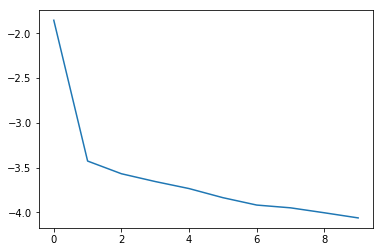

In [11]:
net = sketch_mdn.MixtureRNN(mode = sketch_mdn.NET_MODE_TRAIN, n_hidden_units = 128, n_mixtures = 10, batch_size = 100, sequence_length = 120)
x_t_log = sketch_mdn.generate_data()
loader = sketch_mdn.SequenceDataLoader(num_steps = 121,batch_size = 100, corpus = x_t_log)
losses = net.train(loader, 10, saving=True)
## Plot the losses.
plt.plot(losses)
plt.show()